<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2020 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday October 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**: John Ortiz 

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The practicum is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [66]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [50 points] Problem 1: Elections

# The Election of 1800
### Can we get back to politics? 

source of inspiration: https://en.wikipedia.org/wiki/1800_United_States_presidential_election

These are interesting times in United States politics. John Adams is serving as the second President, and political parties have formed the very first series of "tickets" for President and Vice President nominees. Every state has a different method of selecting electors for the Electoral College. And the idea of winning voter's hearts and minds through campaigning is becoming a pervasive idea. **The two main political parties are the Federalist and the Democratic-Republicans.**

## The Candidates

### Federalist Ticket
* John Adams - Massachusetts
* Charles Cotesworth Pinckney - South Carolina

### Democratic-Republican Ticket
* Thomas Jefferson - Virgina
* Aaron Burr - New York

## The Voters
**As observed in the data set `voters1800.csv`**

* CitizenID - an integer unique number (identifies their row in the table).
* Age - an integer representing years since birth.
* State - a string indentifying the location.
* Interest1 - a string identifying the voter's most important campaign issue.
* Interest2 - a string identifying the voter's second most important campaign issue.
* Interest3 - a string identifying the voter's third most important campaign issue.


### Part 1) A sampling of the voting population

#### Import the dataset...

Import the 'voters1800.csv' as given.

#### A) Getting to know the dataset:
Give a statistical description of the dataset you imported. Be sure to include:
* The number of voters in each State
    * The Tukey 5 Number Summary of age for voters in each state
* A description of the distribution of interests
    * Consider how to represent the distribution of first, second, and third interests
    * Consider the breakdown by state

This is the 5 number summary; however also includes the count,mean, and standard deviation
count    932.000000
mean      49.454936
std       18.327874
min       18.000000
25%       33.750000
50%       49.500000
75%       65.000000
max       80.000000
Name: Age, dtype: float64


Text(0.5, 0, 'Age')

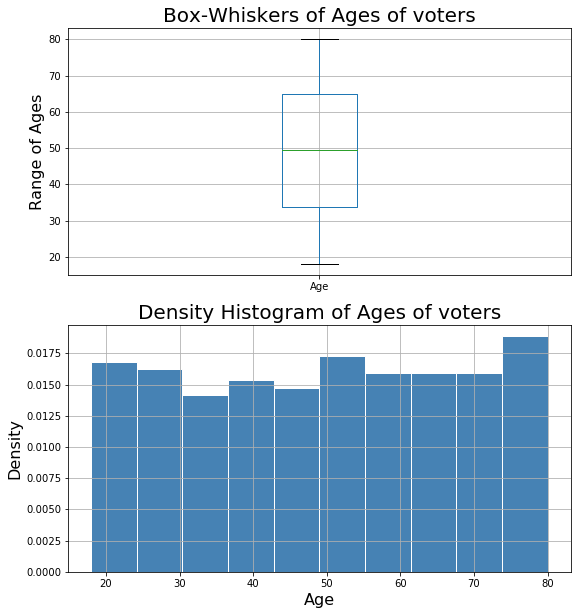

In [46]:
#Your code for 1A here
filepath = 'voters1800.csv'
df = pd.read_csv(filepath)
df.head() # - get a look of dataS
#df.info() - data clean?


#Five number summary For total
Age = df['Age']
print("This is the 5 number summary; however also includes the count,mean, and standard deviation")
print(Age.describe())

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9,10))
df.boxplot(column="Age",ax=axes[0])
Age.hist(ax=axes[1], facecolor="steelblue", edgecolor="white",density ="true")
axes[0].set_title('Box-Whiskers of Ages of voters',fontsize=20)
axes[0].set_ylabel('Range of Ages',fontsize=16)
axes[1].set_title('Density Histogram of Ages of voters',fontsize=20)
axes[1].set_ylabel('Density',fontsize=16)
axes[1].set_xlabel('Age',fontsize=16)

Above is a box-whiskers plot which can show us a pretty good analysis of the ages and five number summary. We can see the standard deviation is approximated as 18, with min of 18 and max of 80 can see it seems to be a normal distribution so far. Lets break the five number summary by state now...

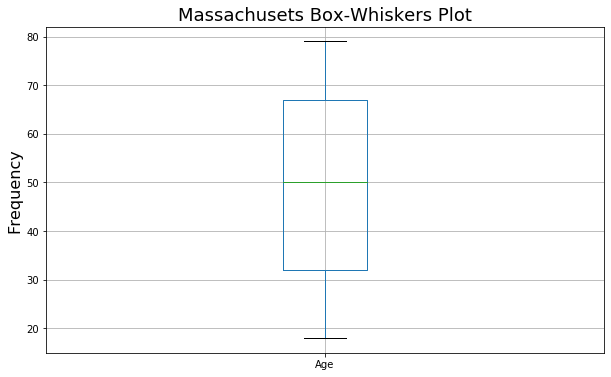

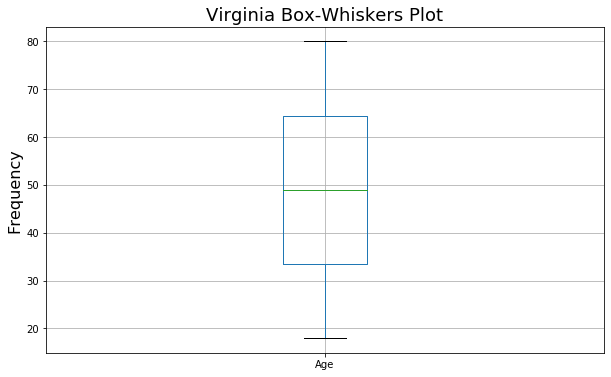

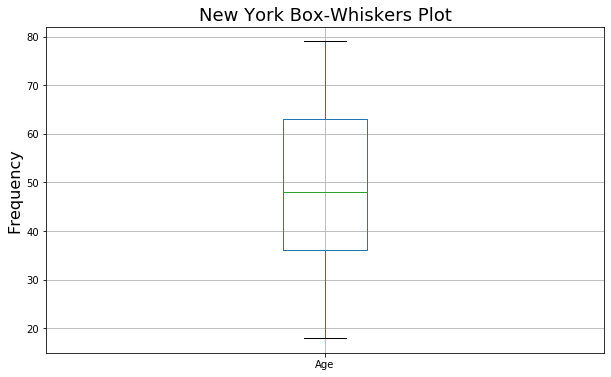

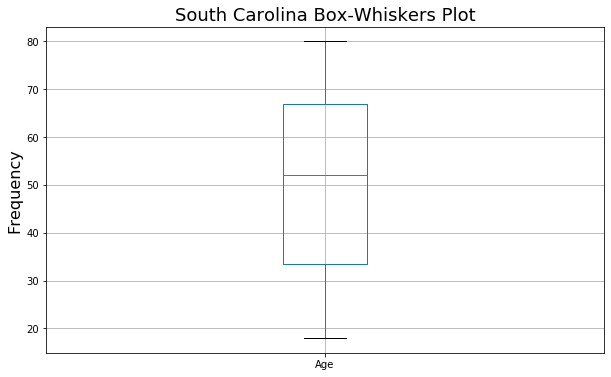

In [65]:
#Five Number Summary For Each State
states = np.array(["Massachusets","Virginia","New York","South Carolina"]) # separate by state
for i in states:
    fig, ax = plt.subplots(figsize=(10,6))
    dfTemp = df.loc[df["State"]== i].copy()
    dfTemp.boxplot(column='Age',ax=ax)
    ax.set_title(str(i)+  ' Box-Whiskers Plot', fontsize=18)
    ax.set_ylabel("Frequency", fontsize=16)
    


We can see that based state the age median slightly change either up(South Carolina, Massachussetts),down(New york,Virginia)

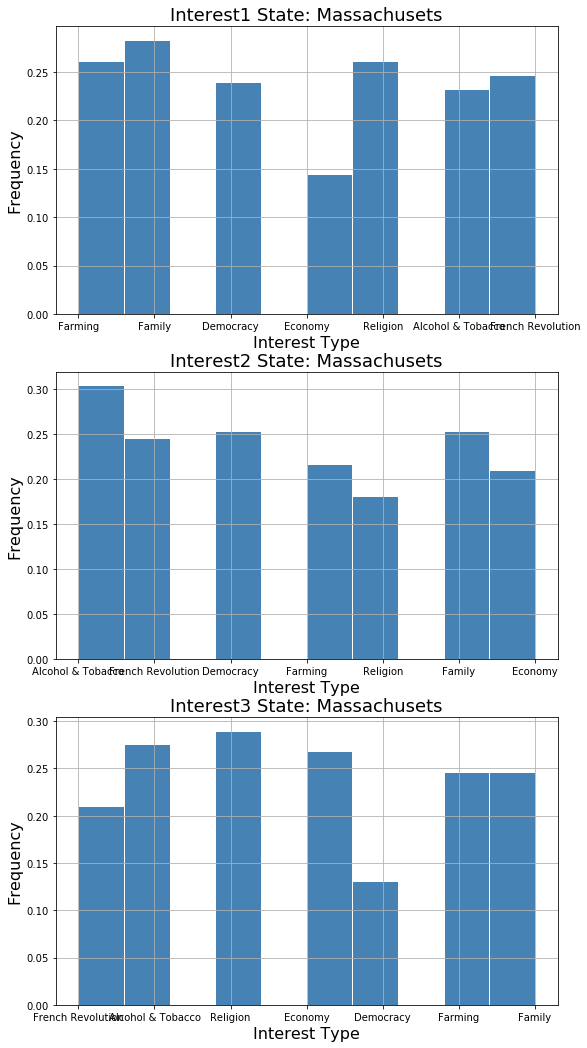

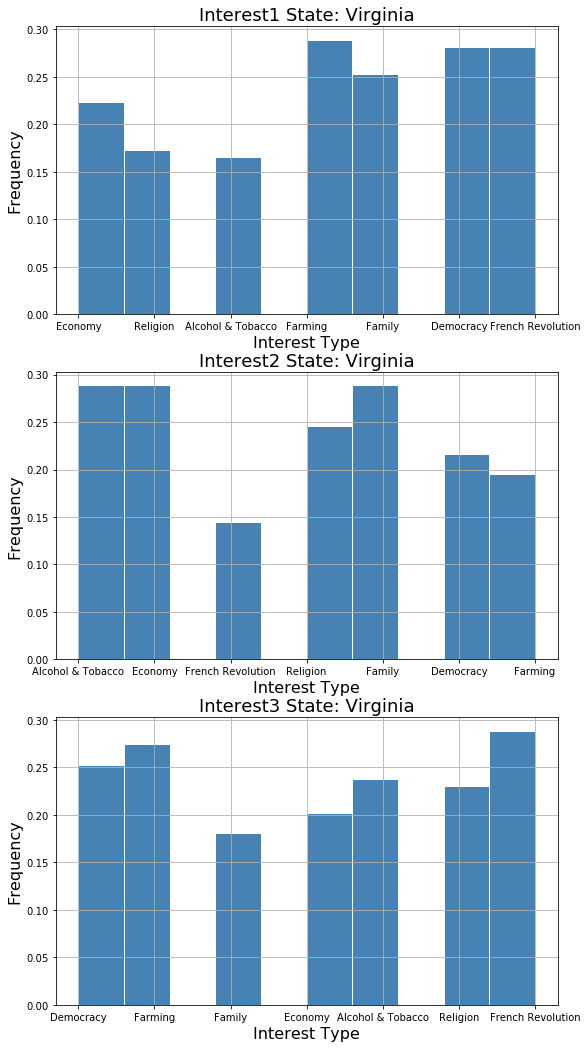

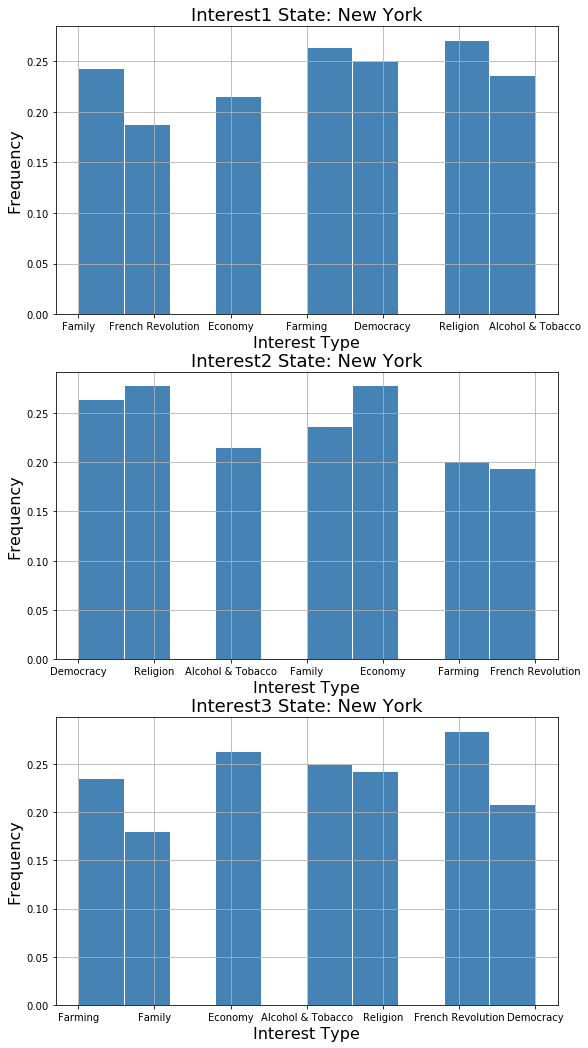

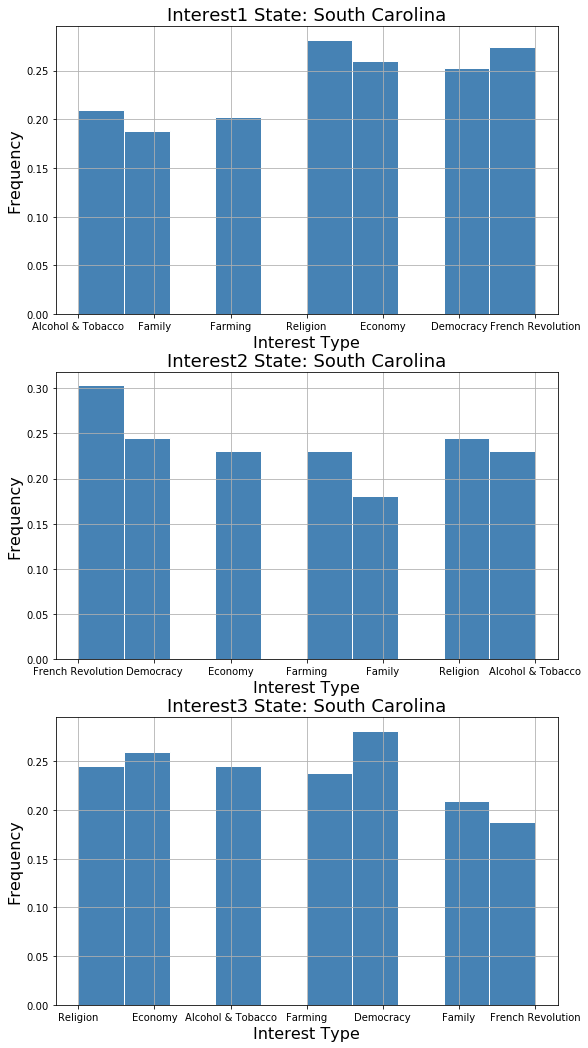

In [67]:
#Description of interests

states = np.array(["Massachusets","Virginia","New York","South Carolina"]) # separate by state
for i in states:
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9,18))
    dfTemp = df.loc[df["State"]== i].copy()
    dfTemp['Interest1'].hist(ax=axes[0], facecolor="steelblue", edgecolor="white",density ="true")
    axes[0].set_title('Interest1 State: ' + str(i), fontsize=18)
    axes[0].set_ylabel("Frequency", fontsize=16)
    axes[0].set_xlabel("Interest Type", fontsize=16)
    dfTemp['Interest2'].hist(ax=axes[1], facecolor="steelblue", edgecolor="white",density ="true")
    axes[1].set_title('Interest2 State: ' + str(i), fontsize=18)
    axes[1].set_ylabel("Frequency", fontsize=16)
    axes[1].set_xlabel("Interest Type", fontsize=16)
    dfTemp['Interest3'].hist(ax=axes[2], facecolor="steelblue", edgecolor="white",density ="true")
    axes[2].set_title('Interest3 State: ' + str(i), fontsize=18)
    axes[2].set_ylabel("Frequency", fontsize=16)
    axes[2].set_xlabel("Interest Type", fontsize=16)
#df.head(100)

Above shows each interest categorized by each State allowing us to have a good understanding of how the state affects which interest they select as first, and which one is more popular.

#### B) Model  baseline voting expecations 
Now that we have a pool of voters, let's model the baseline expectations for a vote.

For clarification, the Electoral College is a part of the process by which the United States votes for the president and vice-president. Each state has a certain number of "electoral votes" based on their populations (states with lower populations have less votes: today, states like Wyoming and Montana have 3 electoral college votes, while California has 55 electoral college votes because it is the state with the highest population) and these votes are cast based on the popular vote - how many voters voted for each politician. In some states, the electoral vote is decided by state-wide plurality - whoever gets the most votes in the entire state gets all of the electoral college votes (winner-take-all). In other states, each electoral college vote is associated with a electoral district and whoever has the most votes in each district takes that point. Though some details have changed, the electoral college operates in much the same way today as it did back in 1800!

Given the following assumptions:

* Each voter makes their decision independently of other voters


* With no other information, each voter is equally likely to vote for one party or the other
    * : i.e. P(Federalist) = P(Democratic-Republican)
   
   
* If a voter is from the same state as one of the presidential nominees, there is an additional **0.1** likelihood that they will vote for that nominee's party 
    * * i.e. if the Federalist president nominee is Ella Sarder from Wisconsin, voters from Wisconsin are 0.1 percent more likely to vote for the Federalists than the average voter. (At this point, they would be 50.1% to Federalist, 49.9% to D-R).
    
    
* If a voter is from the same states as one of the vice-presidental nominees, there is an additional **0.05** likelihood that they will vote for that nominee's party.


* Each state is responsible for a different number of Electoral College votes: 
    * Massachusetts has **16 votes**, and is split by electoral districts
        * Assume an even split among voters 
    * New York has **12 votes** and is Winner-Take-All
    * Virginia has **21 votes** and is split by electoral districts
        * Assume an even split among voters
    * South Carolina has **8 votes** and is Winner-Take-All
    
NOTE: South Carolina delegates were actually chosen by the state legislature, but that doesn't allow us to create such an interesting problem!

What is the expected outcome for an election in these four states? How many electoral college votes will each party ticket receive?

In [282]:
#Your code for 1B here
#choice = np.array(['Federalist','Democratic-Republican'])


#helper function to determine if from same state


#created 4 diff database for each state
dfM = df.loc[df["State"]== "Massachusets"].copy()
dfV = df.loc[df["State"]== "Virginia"].copy()
dfSC = df.loc[df["State"]== "South Carolina"].copy()
dfNY = df.loc[df["State"]== "New York"].copy()



def addVoteColumn(dfTemp,state):
        sway = np.array(["Federalist","Democratic-Republican"])

        #gets number citizens
        countTemp = dfTemp.count()
        count=countTemp[0]
        #creates empty list
        vote =[]
        for i in range(0,count):
            if(state == "Massachusets"):
                choice = np.random.choice(sway, p=[.501,.499]) #John Adam +.01
            elif (state == "Virginia"):
                choice = np.random.choice(sway, p=[.499,.501]) #Thomas Jeff +.01
            elif (state == "South Carolina"):
                choice = np.random.choice(sway, p=[.5005,.4995]) #Charles pinckney +.005
            elif (state == "New York"):
                choice = np.random.choice(sway, p=[.4995,.5005]) #Aaron Burr +.005
            vote.append(choice)
        dfTemp["Vote"] = vote
        return dfTemp
    
#Adding vote to each state citizens
dfM_Voted = addVoteColumn(dfM,"Massachusets")
dfV_Voted = addVoteColumn(dfV,"Virginia")
dfSC_Voted = addVoteColumn(dfSC,"South Carolina")
dfNY_Voted = addVoteColumn(dfNY,"New York")
#dfM_Voted.head(50) 



#split by district - Massachusetts, Virginia   
# --------we have to count the number of votes for each state above find the ratio 
# --------------then apply it to the amount of Votes given as a parameter 
#----------- call the function splitByDistrict
#-----------return a np.array size 2 of votes for Fed, Dem-Rep for a state

def splitByDistrict(numberOfElectoralCollegeVotes,dfTemp,state,formatDetails):
    #gets number citizens
    countTemp = dfTemp.count()
    count=countTemp[0] #-------------Note: this will be the denominator to find the percentages
    #return array instantiation
    electVotes=[]
    
    feds = dfTemp.loc[dfTemp["Vote"]=="Federalist"].count()
    dems = dfTemp.loc[dfTemp["Vote"]=="Democratic-Republican"].count()
    
    #making it readible
    if(formatDetails):
        print(state + " citizens final voting counts:")
        print("Federalist Votes: " + str(feds[0]))
        print("Dem-Rep Votes: " + str(dems[0]))
        print("Total Votes: "+ str(count))
        print(" ")
    ############################################
    
    #calculation votes based on porportions
    fedVotes = np.round(numberOfElectoralCollegeVotes * (feds[0]/count))
    demVotes = numberOfElectoralCollegeVotes - fedVotes
    #demVotes = np.floor(numberOfElectoralCollegeVotes * (dems[0]/count))
    #return an array of int, of ('#votesFederalist' ,'#votesDemocratic-Republican')
    electVotes.append(fedVotes)
    electVotes.append(demVotes)
    return electVotes

#Gets votes for both split even by district
electVotes_Mass = splitByDistrict(16,dfM_Voted,"Massachusets",True)
electVotes_V = splitByDistrict(21,dfV_Voted,"Virginia",True)



#Winner take all - SC and NY
#-----We have to again count the amount Fed vs Dem-rep votes
#---------This time which ever on is greater in number takes all the electoral votes
def winnerTakeAll(numberOfElectoralCollegeVotes,dfTemp,state,formatDetails):
    #gets number citizens
    countTemp = dfTemp.count()
    count=countTemp[0] 
    #return array instantiation
    electVotes=[]
    
    feds = dfTemp.loc[dfTemp["Vote"]=="Federalist"].count()
    dems = dfTemp.loc[dfTemp["Vote"]=="Democratic-Republican"].count()
    
    #making it readible
    if(formatDetails):
        print(state + " citizens final voting counts:")
        print("Federalist Votes: " + str(feds[0]))
        print("Dem-Rep Votes: " + str(dems[0]))
        print("Total Votes: "+ str(count))
        print(" ")
    ############################################
    if(feds[0] > dems[0]):
        electVotes.append(numberOfElectoralCollegeVotes)
        electVotes.append(0)
    elif (feds[0] < dems[0]):
        electVotes.append(0)
        electVotes.append(numberOfElectoralCollegeVotes)
    else:
        #alot of confusion on what to do here so I refereed to the government website - https://www.archives.gov/electoral-college/faq
        #which states if a tie were to occur in a popular vote than it refers to state law
        #the example of the tie used was from virginia, where the reslt was a tie, and then they picked randomly from a hat
        #-- so I will do the same
        choice = np.random.choice(sway, p=[.5,.5])
        if(choice == "Federalist"):
            electVotes.append(numberOfElectoralCollegeVotes)
            electVotes.append(0)
        else:
            electVotes.append(0)
            electVotes.append(numberOfElectoralCollegeVotes)
        #print("error")
    return electVotes

#Gets votes for both winner take all state
electVotes_SC = winnerTakeAll(8,dfSC_Voted,"South Carolina",True)
electVotes_NY = winnerTakeAll(12,dfNY_Voted,"New York",True)

#printing vote simulation results
def printElectVotes(lst,state):
    if(len(lst)<=0):
        print("List Empty")
        return
    print(state)
    print("Electoral Votes For Fedaralist: "+ str(lst[0]))
    print("Electoral Votes For Democratic-Republican: "+ str(lst[1]))
    print("")
    
def calcTotalVotes(lst1,lst2,lst3,lst4,formatDetails):
    fedTot= lst1[0]+lst2[0]+lst3[0]+lst4[0]
    demTot= lst1[1]+lst2[1]+lst3[1]+lst4[1]
    if(formatDetails):
        print("----------------------------")
        print("Overall Result(All 4 states)")
        print("Electoral Votes For Fedaralist: "+ str(fedTot))
        print("Electoral Votes For Democratic-Republican: "+ str(demTot))
        print("")
    if(fedTot < demTot):
        winner = "Democratic-Republican"
        #print("Democratic-Republicans have more electoral votes in these 4 states.")
        return winner
    elif(fedTot > demTot):
        winner = "Federalists"
        #print("Federalists have more electoral votes in these 4 states.")
        return winner
    else: 
        winner = "RIP"
        print("Impossible")
        return winner
print("---------------------------------------------------------------------")
print("The results of the simulated election from four states results are:")
printElectVotes(electVotes_Mass,"Massachusets")
printElectVotes(electVotes_V,"Virginia")
printElectVotes(electVotes_SC,"South Carolina")
printElectVotes(electVotes_NY,"New York")
win = calcTotalVotes(electVotes_Mass,electVotes_V,electVotes_SC,electVotes_NY,True)
print(win + " won in these 4 states")

Massachusets citizens final voting counts:
Federalist Votes: 117
Dem-Rep Votes: 113
Total Votes: 230
 
Virginia citizens final voting counts:
Federalist Votes: 115
Dem-Rep Votes: 116
Total Votes: 231
 
South Carolina citizens final voting counts:
Federalist Votes: 129
Dem-Rep Votes: 102
Total Votes: 231
 
New York citizens final voting counts:
Federalist Votes: 117
Dem-Rep Votes: 123
Total Votes: 240
 
---------------------------------------------------------------------
The results of the simulated election from four states results are:
Massachusets
Electoral Votes For Fedaralist: 8.0
Electoral Votes For Democratic-Republican: 8.0

Virginia
Electoral Votes For Fedaralist: 10.0
Electoral Votes For Democratic-Republican: 11.0

South Carolina
Electoral Votes For Fedaralist: 8
Electoral Votes For Democratic-Republican: 0

New York
Electoral Votes For Fedaralist: 0
Electoral Votes For Democratic-Republican: 12

----------------------------
Overall Result(All 4 states)
Electoral Votes For F

#### C) Electioneering
Of course, this election was really the first one with full-fledged political campaigns, attempting to sway voters with rhetoric and communication. You will play the role of the press secretary for a campaign, leading these efforts. Let's set up a series of rules for how you can influence the election:

* **You can only write one article per day.** Each article can only **cover one Interest**, and can only be **run in one State**. You have to tailor what you write to that population!


* Running a piece in a newspaper will appease voters in that state...
    * If the article is about a voter's **number 1 interest**, it adds **0.3** to the likelihood they will vote for your party.
    * If the article is about a voter's **number 2 interest**, it adds **0.2** to the likelihood they will vote for your party.
    * If the article is about a voter's **number 3 interest**, it adds **0.1** to the likelihood they will vote for your party.
    * If the article is about something a voter has **no interest** in, it only adds **0.02** to the likelihood they will vote for your party, because you are focusing on their state.
    
    
* Running a piece in a newspaper will also dissatisfy voters in other states...
    * The voters in other states will **lose 0.01** to the probability that they will vote for your party, because you are ignoring them.
    
    
* Some topics are big in certain areas!
    * No matter which newspaper you're writing in, news of articles about **Farming** will trickle down to the South (**Virginia and South Carolina**) and will **add 0.02** to the likelihood all voters there will vote for your party.   
    * No matter which newspaper you're writing in, news of articles about the **Economy** will trickle down to the North (**New York and Massachusetts**) and will **add 0.02** to the likelihood all voters there will vote for your party.
    
    
* Some topics are big with certain demographics!
    * No matter a voter's listed interests, writing about the **French Revolution** will **add .05** to the likelihood for **all voters Age 30** or under in any Region (North or South).
    
    * No matter a voter's listed interests, writing about **Alcohol & Tobacco** will **add 0.05** to the likelihood for **all voters Age 60 or above** in any Region (North or South).
    
#### Designing your Campaign Strategy
* You have 30 days to maximize your gains and try to win the election. What is your strategy if
    * you are the Democratic-Republican Ticket?
    * you are the Federalist Ticket?
* Do you manage to win, considering your opponent does nothing?
* Assume that if you somehow manage to add 50 or more likelihood to a single voter  (from 50%), then their P(vote) stops at 100%.

**Before we start quick thoughts/Plan of attack: <br><br>
    -30 days<br>
        1 day: <br>
            1 article(interest, state)<br>
    -Starting with base case:<br>
        Are goal should be to maxmize points for 1 day(than run it 30 times):<br><br>
             -When do you loose probability?<br>
                 Each day the 3 states are not one you picked -.01 for each citizen<br><br>
             -When do you gain probability?<br>
                 It is a person Interest1 +.3<br>
                 It is a person Interest2 +.2  ---if (for person)block<br>
                 It is a person Interest3 +.1<br>
                 It is not a person interest .02 --- else <br><br>
                 If Interest =                 ---if (for state)<br>
                     Farming  -> (Virginia and South Carolina all voters) +.02<br>
                     Economy  -> (New York and Massachusetts all voters) +.02<br>
                     French Revolution & (Age <=30) -> (individual) +.05<br>
                     Alocohol & tobacco & (Age >= 60) -> (individual) +.05<br><br>
            I would think that picking one of the four Interest that have consistent benefits (Farming,economy, french rev, alochol&tobacco) would be advantagoues. The next view I want to talk about is the density histograms shown of the interest by state. Looking at the most advantagoues interests based on approximate estimation of how ofter this interest is an individuals interest1 in each state: <br>
Massachusets -Farming(.28) Economy(.14) French Revolution(.24)  Alcohol & tobacco(.23) <br>
Virginia     -Farming(.28) Economy(.23) French Revolution(.27)  Alcohol & tobacco(.16) <br>
New York     -Farming(.27) Economy(.22) French Revolution(.18)  Alcohol & tobacco(.24) <br>
SC           -Farming(.20) Economy(.26) French Revolution(.27)  Alcohol & tobacco(.21) <br><br>
We can see the top picks of each state so we can now make a conclusive plan.<br>
To begin this plan we set out by defining how we are going to select the state. We will be rotating the 4 states every day so no state is picked less. However, there is a caveat the first two states selected will have 1 extra article written about them. So we have should pick the two states that show the max benifit. The max benefit in terms of probability would happen when a state has the most frequent interest1 be (french revolution or alcohol&tobacco), if those are not available the next best is (Farming & Economy), else we shall randomly pick(1/5) of the interests. Now that we know how to get max benefit we can figure out the lineup. So the first two starting states should be Virginia and South Carolina because they have the highest Alcohol&Tobacco frequency as interest1. Thus, we shall start with (Virginia or South Carolina) with the interest being the french revolution, the other one will be second. Next will be the other two states, so looking the at there frequencies we can pick Farming as the interest for both New York and Massachussetts. Again, the not picked state will simply go after. So in general Campaign Strategy will be: <br>
(Virginia,"French Revolution") &rarr; (South Carolina,"French Revolution") &rarr; (New York,"Farming") &rarr;(Massachussetts,"Farming")<br>
Continuing in that order for thirty days,with Virginia and South Carolina recieving an extra day each.<br><br>
Now the only party I have not addressed yet is would my strategy change based on party. And the short answer is no. This is due to each choices I made in how I am running the article each day. My analysis is based more on statistics than based on political party. Either way I can run the same campaign tailoring to the same demographics. **    

In [307]:
def calc(value,change,isPlus):
    if(isPlus):
        newVal = value + change
        if(newVal >=1):
            newVal= 1
    else:
        newVal = value - change
        if(newVal <0):
            newVal= 0
    
    return  newVal
#helper function that takes a double and applys it to positively to the probability of index given
#  example: (.05     , 0,     [.5,.5]  )
def helpProb(change , index,indivProb):
    # (Fed, Dem-Rep)
    if(index == 0):
        #( +change, -change) federalist get positve increase
        #print("( + " + str(change) + " , - "  + str(change) + "  )")
        indivProb[0] = calc(indivProb[0],change,True)   # =indivProb[0] + change
        indivProb[1] = calc(indivProb[1],change,False)   # =indivProb[1] - change
    elif (index == 1):
        #( -change, +change) dem-rep get positve increase
        #print("( - " + str(change) + " , + "  + str(change) + "  )")
        indivProb[0] = calc(indivProb[0],change,False) # =indivProb[0] - change
        indivProb[1] = calc(indivProb[1],change,True) # =indivProb[1] + change
    else:
        print("----------RIP------------")
    return indivProb

#function that adds vote column
#calls function that simulates 30 days of releasing an article
#------------sim3

def addVoteColumn(dfTemp,team,probTemp):
        probIndiv = np.copy(probTemp)
        #print(probIndiv)
        if(team == "Federalist"):
            sway = np.array(["Federalist","Democratic-Republican"])
        else:
            sway = np.array(["Democratic-Republican","Federalist"])
            
        
        states= np.array(["Virginia","South Carolina","New York","Massachusets"])
        days = 30
        countStates=0
        
        
        
        
        
        
        for i in range(0,days):
            #-each day we need to write an article with (state, interest)
            state= states[countStates]
            #states Virginia and SC have interest being French Revolution as interest of choice for the article
            if(countStates <=1):
                interest= "French Revolution"
            #states NY and Massachussetts have farming as interest of choice for the article
            elif(countStates>1) and (countStates<4) :
                interest= "Farming"
            else:
                #should not get here
                interest= "Religon"
            #this count controls the states order
            #print("Day "+str(i) +": "+ states[countStates]+ " , "+interest) # --sanity check
            countStates+= 1
            if(countStates ==4):
                countStates=0
            
            #we have state and interest
            #need to check each if conditional for changes in probability p[1/2,1/2]
            countRow = 0
            for i in dfTemp.iterrows():
                #print("Individual " +str(countRow+1) + ": ")
                
               
                indivData = i[1]  #an individuals data ( a single row) 
           
                #i[x], where x(int) = 
                # 0 CitizenID 
                # 1 Age
                # 2 State 
                # 3 Interest1
                # 4 Interest2
                # 5 Interest3
                
                #check we have are indivs probability (countRow) 
                #print("Probabilities: " + str(probIndiv[countRow])) 
                
                
                
               # If a voter is from the same state as one of the presidential nominees, there is an additional 0.1 likelihood that they will vote for that nominee's party
#i.e. if the Federalist president nominee is Ella Sarder from Wisconsin, voters from Wisconsin are 0.1 percent more likely to vote for the Federalists than the average voter. (At this point, they would be 50.1% to Federalist, 49.9% to D-R).
#If a voter is from the same states as one of the vice-presidental nominees, there is an additional 0.05 likelihood that they will vote for that nominee's party
                
                #check state 
                if(state == "Massachusets"):
                    probIndiv[countRow] = helpProb(.01,0,probIndiv[countRow]) #John Adam +.01
                elif (state == "Virginia"):
                    probIndiv[countRow] = helpProb(.01,1,probIndiv[countRow]) #Thomas Jeff +.01
                elif (state == "South Carolina"):
                    probIndiv[countRow] = helpProb(.005,0,probIndiv[countRow]) #Charles pinckney +.005
                elif (state == "New York"):
                    probIndiv[countRow] = helpProb(.005,1,probIndiv[countRow]) #Aaron Burr +.005
        
                
                #if state != indiv.state -.01
                if(indivData[2] != state):
                    probIndiv[countRow] = helpProb(.001,1,probIndiv[countRow])
                
                #It is a person Interest1 +.3<br>
                # It is a person Interest2 +.2  ---if (for person)block<br>
                # It is a person Interest3 +.1<br>
                # It is not a person interest .02 --- else <br><br>
                # If Interest =                 ---if (for state)<br>
                #     Farming  -> (Virginia and South Carolina all voters) +.02<br>
                #     Economy  -> (New York and Massachusetts all voters) +.02<br>
                #     French Revolution & (Age <=30) -> (individual) +.05<br>
                #     Alocohol & tobacco & (Age >= 60) -> (individual) +.05<br><br>
                
                #affect only in state of choice
                if(indivData[2] == state):
                    #check interest1
                    if(interest == indivData[3]):
                        probIndiv[countRow] = helpProb(.03,0,probIndiv[countRow])
                     #check interest2
                    elif(interest == indivData[4]):
                        probIndiv[countRow] = helpProb(.02,0,probIndiv[countRow])
                    #check interest3
                    elif(interest == indivData[5]):
                        probIndiv[countRow] = helpProb(.01,0,probIndiv[countRow])

                #check we have are new indivs probability (countRow)
                #print("Changed Probabilities: " + str(probIndiv[countRow]))
                
                
                #by interest
                if(interest == "Farming"):
                    if(indivData[2] == "Virginia") or (indivData[2] == "South Carolina"):
                        probIndiv[countRow] = helpProb(.002,0,probIndiv[countRow])
                elif(interest == "Economy"):
                    if(indivData[2] == "New York") or (indivData[2] == "Massachusetts"):
                        probIndiv[countRow] = helpProb(.002,0,probIndiv[countRow])
                elif(interest == "French Revolution") and (indivData[1] <=30):
                    probIndiv[countRow] = helpProb(.005,0,probIndiv[countRow])
                elif(interest == "Alcohol & Tobacco") and (indivData[1] >=60):
                    probIndiv[countRow] = helpProb(.005,0,probIndiv[countRow])    
                    
                    
                    
                #end of changing a row
                countRow+= 1
        
        vote =[]
        for i in range(0,len(probIndiv)):
            #print("Sway of Individual "+ str(i)+ ": " + str(probIndiv[i]))   #----------------uncomment to see final probabilities of each individuals choice
            choice= np.random.choice(sway, p=probIndiv[i])
            vote.append(choice)
        dfTemp["Vote"] = vote
        return dfTemp

#dfTemp is df
#team is which political party we are
#nSamp is number of simulations
#details is boolean written in for convenience of the grader
def simulate(dfTemp,team,nSamp,details): 
    wins =[]
    #probabilities array for every individual
    probIndiv= []
    for i in dfTemp.iterrows():
        pr = np.array([.5,.5])
        probIndiv.append(pr)
    
    print("Below will list all outcomes to each simulated election")
    print("---------------------------------------------------------------------")
    for i in range(0,nSamp):
        
    
        dfStrat = addVoteColumn(dfTemp,team,probIndiv)



        dfM_Strat = dfStrat.loc[dfStrat["State"]== "Massachusets"].copy()
        dfV_Strat = dfStrat.loc[dfStrat["State"]== "Virginia"].copy()
        dfSC_Strat = dfStrat.loc[dfStrat["State"]== "South Carolina"].copy()
        dfNY_Strat = dfStrat.loc[dfStrat["State"]== "New York"].copy()


        #using functions built in part b

        #Gets votes for both split even by district
        electVotes_Mass_Biased = splitByDistrict(16,dfM_Strat,"Massachusets",False)
        electVotes_V_Biased = splitByDistrict(21,dfV_Strat,"Virginia",False)

        #Gets votes for both winner take all state
        electVotes_SC_Biased = winnerTakeAll(8,dfSC_Strat,"South Carolina",False)
        electVotes_NY_Biased = winnerTakeAll(12,dfNY_Strat,"New York",False)

        #Result of this election
        
        print("The results of the simulated election " + str(i+1)+ ":")
        if(details): #details is boolean for printing more specific data
            printElectVotes(electVotes_Mass_Biased,"Massachusets")
            printElectVotes(electVotes_V_Biased,"Virginia")
            printElectVotes(electVotes_SC_Biased,"South Carolina")
            printElectVotes(electVotes_NY_Biased,"New York")
        winner =calcTotalVotes(electVotes_Mass_Biased,electVotes_V_Biased,electVotes_SC_Biased,electVotes_NY_Biased,True) #----------------------Boolean option for printing total results of each simulation 
        wins.append(winner)
        
        
    #countF =0
    countDR =0
    for i in range(0,len(wins)):
        if(wins[i]=="Democratic-Republican"):
            countDR += 1
        #elif(wins[i]=="Federalist"):
        #    countF += 1
    countF = nSamp - countDR
    #print(wins)
    print("---------------------------------------------------------------------")
    print("Our party is: " + team)
    print("In "+ str(nSamp) + " samples: ")
    print("Federalist won "+ str(countF) + " times")
    print("Democratic-Republican won "+ str(countDR)+ " times")
    if(team == "Democratic-Republican"):
        winPercent= (countDR/nSamp)*100
    else:
        winPercent= (countF/nSamp)*100
    print("With help from my stategy we win " + str(winPercent) + "% of the time")
    
    
    
    
#"Democratic-Republican","Federalist"
simulate(df,"Democratic-Republican",100,False) #--------------------------Boolean option for printing electoral votes for each state in each iteration (takes longer to run)

Below will list all outcomes to each simulated election
---------------------------------------------------------------------
The results of the simulated election 1:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 16.0
Electoral Votes For Democratic-Republican: 41.0

The results of the simulated election 2:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 28.0
Electoral Votes For Democratic-Republican: 29.0

The results of the simulated election 3:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 17.0
Electoral Votes For Democratic-Republican: 40.0

The results of the simulated election 4:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 17.0
Electoral Votes For Democratic-Republican: 40.0

The results of the simulated election 5:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 16.

The results of the simulated election 45:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 17.0
Electoral Votes For Democratic-Republican: 40.0

The results of the simulated election 46:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 16.0
Electoral Votes For Democratic-Republican: 41.0

The results of the simulated election 47:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 15.0
Electoral Votes For Democratic-Republican: 42.0

The results of the simulated election 48:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 16.0
Electoral Votes For Democratic-Republican: 41.0

The results of the simulated election 49:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 15.0
Electoral Votes For Democratic-Republican: 42.0

The results of the simulated election 50:
----------------------------

The results of the simulated election 90:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 15.0
Electoral Votes For Democratic-Republican: 42.0

The results of the simulated election 91:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 15.0
Electoral Votes For Democratic-Republican: 42.0

The results of the simulated election 92:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 15.0
Electoral Votes For Democratic-Republican: 42.0

The results of the simulated election 93:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 15.0
Electoral Votes For Democratic-Republican: 42.0

The results of the simulated election 94:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 16.0
Electoral Votes For Democratic-Republican: 41.0

The results of the simulated election 95:
----------------------------

**Lets start by saying on the side of the above code there is comments that have alot of dashes, those are to distinguish where there either booleans(true - prints, false -does not print) or can uncomment a print for more details. Disregarding logistics, I can say that my campaign strategy worked really well since of the really high percentage, most times it is 98%. This is because the way are campaign strategy worked by understanding frequencies and by reducing to be more focused and getting the "maxBenefit". The way I wrote this we did not get the best maxBenefit, but I think this is definitely a good approximation of what one good strategy could be.**

#### D) Electoral College Shifts

As elections wind down, you discover that some states have made changes to the ways their electoral colleges are selected! In particular...
* **Massachusetts** has delegated the power of selecting the Electoral College votes to the state legislature! Your campaign strategy is no longer relevant. They award **8 votes to the Democratic-Republican Ticket and 6 votes to the Federalist Ticket.**
* **Virginia is now a Winner-Take-All state.** Your campaign strategy better have worked, because 21 votes are now up for grabs!

Do these changes affect the outcomes from your original campaign strategy?

**To start I would say yes they changes the outcomes, but I can not say if it is enough to change outcome of election. So we will run the same campaign strategy, with new adjustments and see the percentage**

In [593]:
#copy of code from C
#adjusted with new information
def calc(value,change,isPlus):
    if(isPlus):
        newVal = value + change
        if(newVal >=1):
            newVal= 1
    else:
        newVal = value - change
        if(newVal <0):
            newVal= 0
    
    return  newVal
#helper function that takes a double and applys it to positively to the probability of index given
#  example: (.05     , 0,     [.5,.5]  )
def helpProb(change , index,indivProb):
    # (Fed, Dem-Rep)
    if(index == 0):
        #( +change, -change) federalist get positve increase
        #print("( + " + str(change) + " , - "  + str(change) + "  )")
        indivProb[0] = calc(indivProb[0],change,True)   # =indivProb[0] + change
        indivProb[1] = calc(indivProb[1],change,False)   # =indivProb[1] - change
    elif (index == 1):
        #( -change, +change) dem-rep get positve increase
        #print("( - " + str(change) + " , + "  + str(change) + "  )")
        indivProb[0] = calc(indivProb[0],change,False) # =indivProb[0] - change
        indivProb[1] = calc(indivProb[1],change,True) # =indivProb[1] + change
    else:
        print("----------RIP------------")
    return indivProb

#function that adds vote column
#calls function that simulates 30 days of releasing an article
#------------sim3

def addVoteColumn(dfTemp,team,probTemp):
        #dfStrat.loc[dfStrat["State"]== "Massachusets"].copy()
        #dfTemp = dfTemp1.loc[dfTemp1["State"]!="Massachusets"].copy()
        probIndiv = np.copy(probTemp)
        #print(probIndiv)
        if(team == "Federalist"):
            sway = np.array(["Federalist","Democratic-Republican"])
        else:
            sway = np.array(["Democratic-Republican","Federalist"])
            
        
        states= np.array(["Virginia","South Carolina","New York"])
        days = 30
        countStates=0
        
        
        
        
        
        
        for i in range(0,days):
            #-each day we need to write an article with (state, interest)
            state= states[countStates]
            #states Virginia and SC have interest being French Revolution as interest of choice for the article
            if(countStates <=1):
                interest= "French Revolution"
            #states NY and Massachussetts have farming as interest of choice for the article
            elif(countStates>1) and (countStates<4) :
                interest= "Farming"
            else:
                #should not get here
                interest= "Religon"
            #this count controls the states order
            #print("Day "+str(i) +": "+ states[countStates]+ " , "+interest) # --sanity check
            countStates+= 1
            if(countStates ==3):
                countStates=0
            
            #we have state and interest
            #need to check each if conditional for changes in probability p[1/2,1/2]
            countRow = 0
            for i in dfTemp.iterrows():
                #print("Individual " +str(countRow+1) + ": ")
                
               
                indivData = i[1]  #an individuals data ( a single row) 
           
                #i[x], where x(int) = 
                # 0 CitizenID 
                # 1 Age
                # 2 State 
                # 3 Interest1
                # 4 Interest2
                # 5 Interest3
                
                #check we have are indivs probability (countRow) 
                #print("Probabilities: " + str(probIndiv[countRow])) 
                
                
                #check state 
                #if(state == "Massachusets"):
                #    probIndiv[countRow] = helpProb(.01,0,probIndiv[countRow]) #John Adam +.01
                if (state == "Virginia"):
                    probIndiv[countRow] = helpProb(.01,1,probIndiv[countRow]) #Thomas Jeff +.01
                elif (state == "South Carolina"):
                    probIndiv[countRow] = helpProb(.005,0,probIndiv[countRow]) #Charles pinckney +.005
                elif (state == "New York"):
                    probIndiv[countRow] = helpProb(.005,1,probIndiv[countRow]) #Aaron Burr +.005
        
                
                #if state != indiv.state -.01
                if(indivData[2] != state):
                    probIndiv[countRow] = helpProb(.001,1,probIndiv[countRow])
                
                #It is a person Interest1 +.3<br>
                # It is a person Interest2 +.2  ---if (for person)block<br>
                # It is a person Interest3 +.1<br>
                # It is not a person interest .02 --- else <br><br>
                # If Interest =                 ---if (for state)<br>
                #     Farming  -> (Virginia and South Carolina all voters) +.02<br>
                #     Economy  -> (New York and Massachusetts all voters) +.02<br>
                #     French Revolution & (Age <=30) -> (individual) +.05<br>
                #     Alocohol & tobacco & (Age >= 60) -> (individual) +.05<br><br>
                
                #affect only in state of choice
                if(indivData[2] == state):
                    #check interest1
                    if(interest == indivData[3]):
                        probIndiv[countRow] = helpProb(.03,0,probIndiv[countRow])
                     #check interest2
                    elif(interest == indivData[4]):
                        probIndiv[countRow] = helpProb(.02,0,probIndiv[countRow])
                    #check interest3
                    elif(interest == indivData[5]):
                        probIndiv[countRow] = helpProb(.01,0,probIndiv[countRow])

                #check we have are new indivs probability (countRow)
                #print("Changed Probabilities: " + str(probIndiv[countRow]))
                
                
                #by interest
                if(interest == "Farming"):
                    if(indivData[2] == "Virginia") or (indivData[2] == "South Carolina"):
                        probIndiv[countRow] = helpProb(.002,0,probIndiv[countRow])
                elif(interest == "Economy"):
                    if(indivData[2] == "New York"): #or (indivData[2] == "Massachusetts"):
                        probIndiv[countRow] = helpProb(.002,0,probIndiv[countRow])
                elif(interest == "French Revolution") and (indivData[1] <=30):
                    probIndiv[countRow] = helpProb(.005,0,probIndiv[countRow])
                elif(interest == "Alcohol & Tobacco") and (indivData[1] >=60):
                    probIndiv[countRow] = helpProb(.005,0,probIndiv[countRow])    
                    
                    
                    
                #end of changing a row
                countRow+= 1
        
        vote =[]
        for i in range(0,len(probIndiv)):
            #print("Sway of Individual "+ str(i)+ ": " + str(probIndiv[i]))   #----------------uncomment to see final probabilities of each individuals choice
            choice= np.random.choice(sway, p=probIndiv[i])
            vote.append(choice)
        dfTemp["Vote"] = vote
        return dfTemp

#dfTemp is df
#team is which political party we are
#nSamp is number of simulations
#details is boolean written in for convenience of the grader
def simulate(dfTemp,team,nSamp,details): 
    wins =[]
    #probabilities array for every individual
    probIndiv= []
    for i in dfTemp.iterrows():
        pr = np.array([.5,.5])
        probIndiv.append(pr)
    
    print("Below will list all outcomes to each simulated election")
    print("---------------------------------------------------------------------")
    for i in range(0,nSamp):
        
    
        dfStrat = addVoteColumn(dfTemp,team,probIndiv)



        #dfM_Strat = dfStrat.loc[dfStrat["State"]== "Massachusets"].copy()
        dfV_Strat = dfStrat.loc[dfStrat["State"]== "Virginia"].copy()
        dfSC_Strat = dfStrat.loc[dfStrat["State"]== "South Carolina"].copy()
        dfNY_Strat = dfStrat.loc[dfStrat["State"]== "New York"].copy()


        #using functions built in part b

        #Gets votes for both split even by district
        #electVotes_Mass_Biased = splitByDistrict(16,dfM_Strat,"Massachusets",False)
        #electVotes_V_Biased = splitByDistrict(21,dfV_Strat,"Virginia",False)

        #Gets votes for both winner take all state
        electVotes_SC_Biased = winnerTakeAll(8,dfSC_Strat,"South Carolina",False)
        electVotes_NY_Biased = winnerTakeAll(12,dfNY_Strat,"New York",False)
        electVotes_V_Biased = winnerTakeAll(21,dfV_Strat,"Virginia",False)

        #Result of this election
        
        print("The results of the simulated election " + str(i+1)+ ":")
        if(details): #details is boolean for printing more specific data
            #printElectVotes(electVotes_Mass_Biased,"Massachusets")
            printElectVotes(electVotes_V_Biased,"Virginia")
            printElectVotes(electVotes_SC_Biased,"South Carolina")
            printElectVotes(electVotes_NY_Biased,"New York")
        winner =calcTotalVotes(electVotes_Mass_Biased,electVotes_V_Biased,electVotes_SC_Biased,electVotes_NY_Biased,True) #----------------------Boolean option for printing total results of each simulation 
        wins.append(winner)
        
        
    #countF =0
    countDR =0
    for i in range(0,len(wins)):
        if(wins[i]=="Democratic-Republican"):
            countDR += 1
        #elif(wins[i]=="Federalist"):
        #    countF += 1
    countF = nSamp - countDR
    #print(wins)
    print("---------------------------------------------------------------------")
    print("Our party is: " + team)
    print("In "+ str(nSamp) + " samples: ")
    print("Federalist won "+ str(countF) + " times")
    print("Democratic-Republican won "+ str(countDR)+ " times")
    if(team == "Democratic-Republican"):
        winPercent= (countDR/nSamp)*100
    else:
        winPercent= (countF/nSamp)*100
    print("With help from my stategy we win " + str(winPercent) + "% of the time")
    
    
    
dfNew =df.loc[df["State"]!="Massachusets"].copy()    
#"Democratic-Republican","Federalist"
simulate(dfNew,"Democratic-Republican",50,False) #--------------------------Boolean option for printing electoral votes for each state in each iteration (takes longer to run)

Below will list all outcomes to each simulated election
---------------------------------------------------------------------
The results of the simulated election 1:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 49.0
Electoral Votes For Democratic-Republican: 8.0

The results of the simulated election 2:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 28.0
Electoral Votes For Democratic-Republican: 29.0

The results of the simulated election 3:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 20.0
Electoral Votes For Democratic-Republican: 37.0

The results of the simulated election 4:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 49.0
Electoral Votes For Democratic-Republican: 8.0

The results of the simulated election 5:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 41.0


The results of the simulated election 45:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 41.0
Electoral Votes For Democratic-Republican: 16.0

The results of the simulated election 46:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 41.0
Electoral Votes For Democratic-Republican: 16.0

The results of the simulated election 47:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 49.0
Electoral Votes For Democratic-Republican: 8.0

The results of the simulated election 48:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 41.0
Electoral Votes For Democratic-Republican: 16.0

The results of the simulated election 49:
----------------------------
Overall Result(All 4 states)
Electoral Votes For Fedaralist: 49.0
Electoral Votes For Democratic-Republican: 8.0

The results of the simulated election 50:
----------------------------
O

So in conclusion, it decreases my strategie's percentage of winning by approximately by half.  

<br>

---
[Back to top](#top)
<a id='p2'></a>

## [50 points] Problem 2: An Intro to Computational Epidemiology

### The Model

In this problem we introduce and begin to explore some of the baseline tools of computational epidemiology: the SIR and SI models.  

Note: There are a number of images in this problem.  If you can't get them to display properly, they are hosted at https://drive.google.com/drive/folders/1cZ2JZ2TiHja5qCpLTD2WVEh8tEM8pfU_?usp=sharing

These models exist on graphs, where vertices or nodes represent people, agents, or surfaces that might carry a communicable disease.  Edges connecting nodes represent nodes that are in close contact with one another, and at risk of exchanging the disease.  


We will implement a variant of the SIR model.  In this model, each vertex has one of three possible states:
 - **I** for Infected, and at risk of passing the disease to neighboring susceptible vertices.
 - **S** for Susceptible, and at risk of becoming infected by its neighbors
 - **R** for removed, and no longer at risk of contracting or spreading the infection.

The model evolves *iteratively*, where for each discrete time step (one unit of `time`) the following two calculations occur:

** Step 1:** First, consider all **edges** that connect an infected person to a susceptible person.  The susceptible vertex becomes infected with independent and identical probability $\beta$ *for each* edge that that connects them to an infected vertex.  This is depicted below in the SIR_Edges.png image.

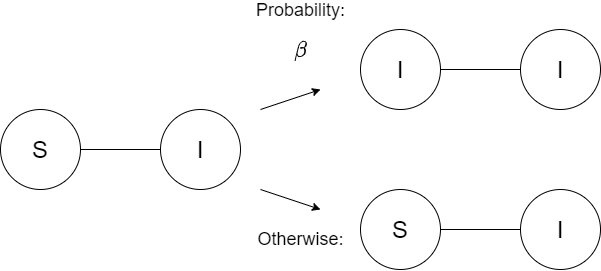

A susceptible edge can only be infected once, and is only at risk of being infected by nodes that were infected (**I**) at the *start* of each iteration: newly infected nodes don't pass the infection onwards until the next time step.

** Step 2: ** Next, consider all infected (**I**) **vertices** that were infected at the *start* of the time step - prior to step 1 - and consider them recovered **R** with probability $\gamma$.  This is depicted below in the SIR_Removal.png image.

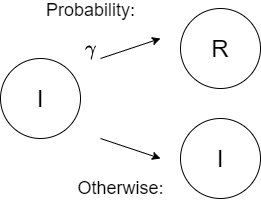

Think of this process as the probability of becoming well: not only are those ndoes no longer contagious, they also have developed antibodies that make them immune to re-infection!

The model can run for any number of time steps, but for reasonably small graphs we might expect to see the number of infections taper off to zero after a while.  If you watched any news coverage during the onset of COVID-19, one of the main tasks in predicting a pandemic is predicting the *basic reproduction number* $R_0= \frac{\beta}{\gamma}$ of the disease.  Since $\beta$ represents a rate of spread and $\gamma$ represents a rate of recovery, the ratio is important in determining whether a disease spreads faster than recovery can occur.

### Warmups

A couple of quick questions to make sure we're understanding the model and the roles of $\beta$ and $\gamma$.

Feel free to use office hours/piazza to ask more pointed questions about the Warmups **only** to make sure you understand the basics of the transition model before you approach the implementation section later.

**Part A**

Suppose we have the small system depicted at time $t=0$ below, in SIR_Warmup1.png.

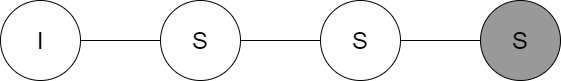

What is the exact probability that the last node on the right is an infected node **I** after exactly 3 time steps?  What is the exact probability that the leftmost node is still infected at this time?

**Solution to Part A**: <br><br>
*What is the exact probability that the last node on the right is an infected node I after exactly 3 time steps?* <br>
So the first idea we want to define is that what we want to solve can either set up as an inclusive or or an and depending on which way you want to solve it.However, in this case it is advantagoues to find the probability of not infected and take the complement to find the answer. <br>
P($S_3$ is Infect) = 1 - P($S_3$ is NOT Infected) <br>
= $1- $( P($S_1$ is NOT Infected) AND P($S_2$ is NOT Infected) AND P($S_3$ is NOT Infected) <br>
= $1- $( (1-$\beta$) AND (1-$\beta$) AND (1-$\beta$) ) <br>
= $1- $( (1-$\beta$) * (1-$\beta$) * (1-$\beta$) ) <br>
= $1- $ $(1-\beta)^3$ <br>

*What is the exact probability that the leftmost node is still infected at this time? <br>
Note for this question we are finding the probability of an infected node. An infected node can only stay infected or be removed(no longer has nor is susceptible to I). Each step is independent allowing us to multiply each step together* <br>
P($I_1$ is infected after 3 steps) = 1-P($I_1$ is NOT infected after 3 step) <br>
= 1- ( P($I_1$ is NOT infected(Removed) after 1 step)  AND P($I_1$ is NOT infected(Removed) after 2 step) AND P($I_1$ is NOT infected(Removed) after 1 step) )<br>
= 1 - ( ($1-\gamma$)  * ($1-\gamma$) * ($1-\gamma$) )<br>
= $1 - (1 -\gamma)^3$<br>

**Part B**

Suppose we consider the alternative 4-vertex graph depicted below, in SIR_Warmup2.png.

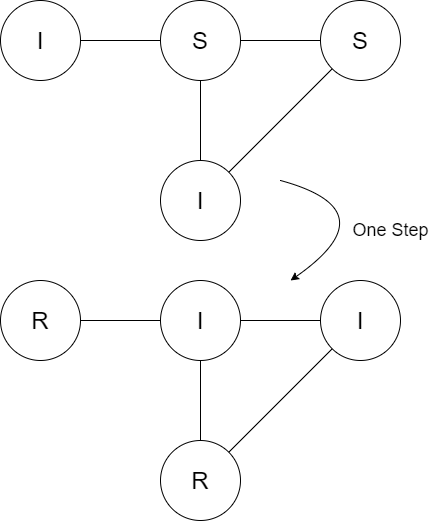

What is the exact probability that we transition from the graph on the top to the exact graph on the bottom in a single time step?  Note that the "center" **S** node with two infected neighbors should be more likely to end up infected than rightmost node.

**Solution to Part B**: <br>
We will use the same approach as last time, attempt to make all the probabilities independent...<br>
Labeling each node with a number: top left node = 1, middle node = 2, top right node 3, bottom node =4 <br>
P(1 is Removed) =  $1-\gamma$ <br>
P(4 is Removed) =  $1-\gamma$ <br>
P(2 is Infected) = 1- (P(2 is NOT Infected by 1) AND P(2 is NOT Infected by 4) )= $1- ( (1-\beta) * (1-\beta)) = 1- (1-\beta)^2 = \beta^2 - 2\beta$<br>
P(3 is Infected) = 1- (P(3 is NOT Infected by 4) = $1-(1-\beta) = \beta$ <br>
Note each edge makes each node infection or recovery independent, so we can AND each of the above Probabilities...
P(Exact Graph) = P(1 is Removed) AND P(4 is Removed) AND P(2 is Infected) AND P(3 is Infected) <br>
= $(1-\gamma)  * (1-\gamma) *(\beta^2 - 2\beta) * \beta$ <br>
= $ (1-\gamma)^2\beta^2(\beta -2)$

### Coding The Model

Enough with the exact pen-and-paper solutions!  Let's run this model.  Suppose we wish to implement the SIR model on the graph below (SIR_graph.png):

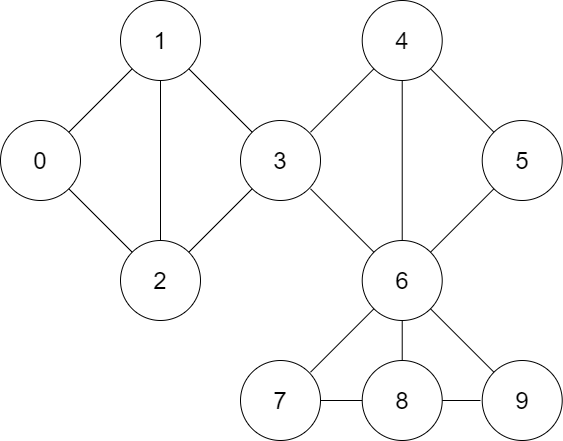

For your convenience, one way to represent this graph as a dictionary of neighbors is listed below.

`nodes` holds the 10 vertices, labelled by their indexes 0 through 9.
`neighbors` is a dictionary, where e.g. `neighbors[1]` holds the list of neighboring vertices to vertex #1.

In [546]:
nodes = list(range(10))
N = len(nodes)
neighbors = {0 : [1,2], 1 : [0,2,3], 2 : [0,1,3], 3 : [1,2,4,6], 4 : [3,5,6], \
             5 : [4,6], 6 : [3,4,5,7,8,9], 7 : [6,8], 8 : [6,7,9], 9 : [6,8]}
#edges= np.array([(0,1), (0,2),(1,2),(1,3),(2,3),(3,4),(3,6)(4,5),(4,6),(5,6),(6,7),(6,8),(6,9),(7,8),(8,9)])
#Dictionary usage:
for node in neighbors:
    print('Node # ',node, ' has neighbors of ', neighbors[node])

Node #  0  has neighbors of  [1, 2]
Node #  1  has neighbors of  [0, 2, 3]
Node #  2  has neighbors of  [0, 1, 3]
Node #  3  has neighbors of  [1, 2, 4, 6]
Node #  4  has neighbors of  [3, 5, 6]
Node #  5  has neighbors of  [4, 6]
Node #  6  has neighbors of  [3, 4, 5, 7, 8, 9]
Node #  7  has neighbors of  [6, 8]
Node #  8  has neighbors of  [6, 7, 9]
Node #  9  has neighbors of  [6, 8]


**Part C:**

Implement a function **SIR_step(states, gamma, beta)** that takes one step of the SIR model with a known $\beta$ and $\gamma$ on the graph given above.

* **initial_state** should be a list of length 10 of the state of each vertex, e.g. [S,S,S,I,I,S,S,S,S,I].
* **gamma** is the constant determining recovery rate.
* **beta** is the constant determining transmission rate.

The return of the function should be the new states for each vertex, in the same format as **initial_state**.

To actually implement this model, you may want to create a list of `edges` rather than just neighbors, because one way to implement one step 1 of the model is to loop over all edges.  Note that each edge should appear exactly once in this loop.


In [547]:
def noInfections(initial_state):
    for i in range(0,10):
        if(initial_state[i]== "I"):
            return False
    return True

        
        
# Goal: use random.choice to see if a node has been infect or removed
def possibleChangeState(state,gamma,beta):
    booList =np.array([True,False])
    if(state== "S"): #if it is susceptible
        #they have beta chance to be infected
        isI= np.random.choice(booList, p=[beta,1-beta])
        if(isI):
            return "I"
        else:
            return state
    elif(state== "I"):
        #they have gamma chance to be removed
        isR= np.random.choice(booList, p=[gamma,1-gamma])
        if(isR):
            return "R"
        else:
            return state
    else:
        return state
    
    
def SIR_step(initial_state, gamma, beta):
    edges = [[0,1],[0,2],[1,2],[1,3],[2,3],[3,4],[3,6],[4,5],[4,6],[5,6],[6,7],[6,8],[6,9],[7,8],[8,9]]
    sizeEdges =len(edges)
    #no infection
    noI = noInfections(initial_state)
    if(noI):# want true when no infections
        #print("No Infections!!!!!!!!")
        return initial_state
     
    new_state= initial_state.copy()  
        
        
    #check size of state
    if(len(initial_state) <10):
        raise ValueError("initial state size is less than 10...")
        
    booList = np.array([True,False])
    
    for i in range(0,10): #run through the list
        
        if(initial_state[i]== "I"):
            #Step1: first consider all edges than can infect person i
            for j in range(0,sizeEdges):
                node1 =edges[j][0]
                node2 =edges[j][1]
                if (node1 == i) and (initial_state[node2] == "S") and(initial_state[node2]!="R"): #gets any edge touching the node 
                    #print("Node "+ str(i) +" can possibly infect node: " + str(node2))   
                    test= possibleChangeState(initial_state[node2],gamma,beta)
                    new_state[node2] = test
                    #if(i<3):
                        #print("For node i: "+ test + "attempted change state")
                        
                elif (node2 == i)and (initial_state[node1] == "S")and(initial_state[node1]!="R"):
                    #print("Node "+ str(i) +" can possibly infect node: " + str(node1))
                    test= possibleChangeState(initial_state[node1],gamma,beta)
                    new_state[node1] = test
                    #if(i<3):
                        #print("For node i: "+ test + "attempted change state")
            #Step2: consider all infected vertices in initial_state and see if they become removed
            new_state[i] = possibleChangeState(initial_state[i],gamma,beta)
            
    #print("")
    return(new_state)

   



Run a couple of quick sanity checks and self-checks below:
 - what should happen if `states` contains no **I** nodes?
 - what should happen if `states` contains **I** nodes but $\beta=0$?


In [595]:
#Check your code is working for some trivial cases:

#what should happen if states contains no I nodes?
states1 = np.array(["S","S","S","S","S"
              ,"S","S","S","S","S"])
print("Initial State: " + str(states1))
print("After Step State: " + str(SIR_step(states1, .3,.3)))
#should return same list

#what should happen if states contains I nodes but  𝛽=0 ?
statesI = np.array(["S","S","S","I","I"
              ,"S","I","S","S","S"])
print("Initial State: " + str(statesI))
print("After Step State: " + str(SIR_step(statesI, .7,0)))
#should not change any S to I

Initial State: ['S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S']
After Step State: ['S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S']
Initial State: ['S' 'S' 'S' 'I' 'I' 'S' 'I' 'S' 'S' 'S']
After Step State: ['S' 'S' 'S' 'I' 'R' 'S' 'I' 'S' 'S' 'S']


Time to run the model for an initial set of states and describe what happens!  Suppose the initial states of each of the nodes is given by:

`states=[S, S, S, I, I, S, I, S, S, S]`

so nodes labelled 3, 4,  and 6 are infected.  


**Part D:**
Now we want to create a function or a loop that runs **SIR_step** for 500 time steps.  At each step, you should save the current state of each node (you may want to create a data frame to hold them, like `df_per_run`).  When we take 500 steps, this represents *one* example of what could happen when an infection is set loose in a small (compartmental) environment.  As data scientists, we need to run this 500-step experiment multiple times to understand the overall descriptors of our simulated pandemic!

Repeat this experiment 100 times (so you'll have 100 instances of 500 time steps) under 3 different sets of values of the constants $\gamma$ and $\beta$.  You'll want another data frame to save some aggregate descriptors of each run, like `df_overall`.  The three sets of conditions we should run experiments under are:

* First, when the values of $\gamma$ and $\beta$ are each 0.1.
* Second, when $\beta=0.2$ and $\gamma=0.05$.
* Finally, when $\beta=0.05$ and $\gamma=0.2$.

For each, you'll want to save the time step (if any) at which the infection ends and the time spend infected for each node.

In [549]:
#recommended per_run setup.  Put this in a loop/function:
#df_per_run=pd.DataFrame(data=None, columns=np.array(range(10)))
#df_per_run.loc[0,:]=['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
#df_per_run.head()

#helperfunction for counting infectiontime
def incrementInfectTime(state,infectTime):
    for i in range(0,10):
        if(state[i]=="I"):
            infectTime[i]+= 1
    return infectTime
def step500(gamma, beta):
    df_per_run=pd.DataFrame(data=None, columns=np.array(range(10)))
    df_per_run.loc[0,:]=['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
    infectionEnd = -1
    infectionTime = [0,0,0,1,1,0,1,0,0,0]
    infectionFlag = True #to catch the if when there is no infections since it is checked in the loop below
    for i in range(1,501):#501
        #gets the next step
        new_state =SIR_step(df_per_run.loc[i-1,:],gamma,beta)
    
        #adds new state to dataframe
        df_per_run.loc[i,:]= new_state
        #print(df_per_run.loc[i,:])
        #tracks which timestep which the infection ends
        if((noInfections(new_state)) and (infectionFlag)):
            #if true record time step
            infectionEnd = i
            infectionFlag = False
            
        #tracks the time of how long each now is infected
        infectionTime = incrementInfectTime(new_state,infectionTime)
    #add infectionTime array to end of df
    #df_per_run.loc[51,:]= infectionTime #501
    #print(df_per_run.loc[500,:])
    return (infectionTime, infectionEnd)

def simulate100_Times(gamma, beta):
    df_overall= pd.DataFrame(data=None, columns=np.array(range(10)))
    infectionTimeList=[]
    for i in range(0,100):
        infectionArr = step500(gamma,beta)
        df_overall.loc[i,:]= infectionArr[0]
        infectionTimeList.append(infectionArr[1])
        
    print("Overall Database of 100 sims: ")
    print(df_overall)
    print("")
    print("Infection Times for each time:")
    print(infectionTimeList)
    return (df_overall,infectionTimeList)

values = [[.1,.1],[.05,.2],[.2,.05]] 
dfBigThree =[]
infectThreeList =[]
for i in values:
    print("Trial with [gamma,beta] being: " +str(i))
    trial = simulate100_Times(i[0],i[1])
    dfTemp= trial[0]
    dfBigThree.append(dfTemp)
    infectThreeList.append(trial[1])
    print("------------------------------------------------------------------------")
#extract the following: time step at which infection ended, time spent infected for each node.
#one idea: save in new df:
# df_overall= #up to you!

Trial with [gamma,beta] being: [0.1, 0.1]
Overall Database of 100 sims: 
       0     1     2     3     4     5     6    7     8     9
0    0.0   0.0   0.0   3.0  19.0   3.0  27.0  4.0   8.0  38.0
1    0.0   0.0   0.0   1.0   1.0   9.0   5.0  8.0  14.0   0.0
2    9.0   9.0   3.0   2.0   1.0   0.0   6.0  0.0   0.0   0.0
3    9.0  21.0  17.0   7.0  11.0   7.0  10.0  4.0   2.0   7.0
4   13.0   2.0  10.0  19.0  15.0   2.0  26.0  6.0   0.0  13.0
..   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...
95   0.0  13.0   5.0   6.0   2.0   0.0  14.0  8.0   0.0   6.0
96   7.0   5.0   4.0  33.0   2.0   0.0   1.0  0.0   0.0   0.0
97   0.0   0.0   0.0   4.0  29.0  24.0  10.0  4.0   5.0   0.0
98  10.0  16.0   8.0  34.0   6.0   0.0   2.0  0.0   0.0   3.0
99   0.0   3.0   0.0  14.0   3.0   0.0  14.0  0.0   3.0   5.0

[100 rows x 10 columns]

Infection Times for each time:
[43, 15, 16, 26, 26, 16, 36, 35, 39, 16, 47, 45, 37, 22, 21, 33, 37, 14, 44, 33, 6, 15, 21, 43, 26, 11, 22, 12, 42, 19, 23, 26

**Part E:**

For each one of those 3 sets of experiments, report what proportion of the time was node 0 *never* infected?


In [550]:
def run():
    for i in range(0,len(dfBigThree)):
        beta=values[i][1]
        gamma=values[i][0]
        countZero=0
        #goal: figure what p_0s?
        dfTemp = dfBigThree[i]
        for j in dfTemp[0]:
            if(j == 0.0):
                countZero += 1
        p_0s = (countZero / len(dfTemp[0]))
        print('For beta=',beta,' and gamma=',gamma,' observed node zero never infected', p_0s  ,'proportion of the time')
run()

#recommended output style:
#print('For beta=',beta,' and gamma=',gamma,' observed node zero never infected', p_0s  ,'proportion of the time')
#dfTemp = dfBigThree[i]

For beta= 0.1  and gamma= 0.1  observed node zero never infected 0.5 proportion of the time
For beta= 0.2  and gamma= 0.05  observed node zero never infected 0.17 proportion of the time
For beta= 0.05  and gamma= 0.2  observed node zero never infected 0.96 proportion of the time


** Part F: **

Was there a time step after which no nodes were infected?  If so, when did this happen?  Make a three vertically-aligned histograms of when the infection disappeared, including instances where it was still present at time 500 as `time=501`.

List of the timestamp of when the trial no longer has any infections with beta=0.1 and gamma=0.1
[43, 15, 16, 26, 26, 16, 36, 35, 39, 16, 47, 45, 37, 22, 21, 33, 37, 14, 44, 33, 6, 15, 21, 43, 26, 11, 22, 12, 42, 19, 23, 26, 13, 32, 25, 45, 40, 14, 11, 27, 35, 10, 28, 27, 22, 18, 42, 22, 23, 49, 35, 18, 2, 15, 26, 25, 6, 45, 42, 19, 12, 36, 31, 35, 26, 42, 26, 20, 20, 59, 36, 33, 26, 27, 23, 36, 41, 19, 19, 32, 29, 35, 32, 15, 18, 27, 30, 23, 34, 25, 30, 15, 29, 18, 25, 19, 33, 29, 34, 14]

List of the timestamp of when the trial no longer has any infections with beta=0.2 and gamma=0.05
[64, 62, 59, 70, 65, 77, 69, 33, 59, 44, 73, 68, 69, 47, 49, 45, 66, 36, 36, 34, 56, 18, 44, 72, 78, 36, 43, 64, 31, 84, 49, 42, 80, 74, 33, 54, 88, 74, 50, 60, 33, 41, 64, 60, 91, 40, 90, 196, 24, 109, 100, 47, 49, 76, 96, 106, 38, 41, 43, 48, 75, 55, 48, 71, 113, 32, 48, 77, 35, 41, 44, 87, 35, 50, 40, 11, 28, 69, 99, 45, 64, 100, 50, 40, 45, 56, 35, 54, 61, 57, 68, 76, 37, 129, 50, 35, 41, 66, 70, 47

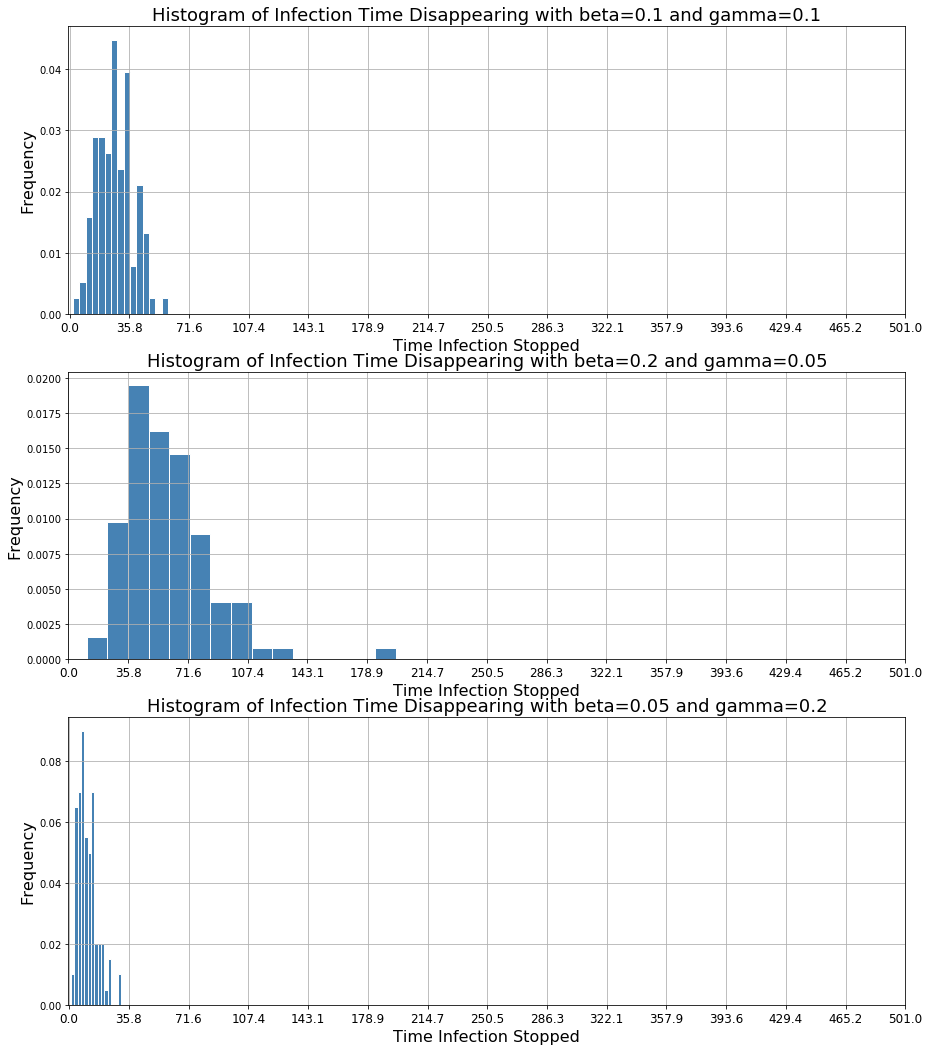

In [592]:
#infectThreeList

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,18))


df_Temp= pd.DataFrame(data=None, columns=np.array(range(2)))
for i in range(0,len(infectThreeList)):
    beta=values[i][1]
    gamma=values[i][0]
    print("List of the timestamp of when the trial no longer has any infections with beta="+ str(beta)+' and gamma='+str(gamma))
    dfTemp[i]= infectThreeList[i]
    print(infectThreeList[i])
    print("")
    dfTemp[i].hist(ax=axes[i], facecolor="steelblue", edgecolor="white",density ="true",bins=15)
    axes[i].set_title('Histogram of Infection Time Disappearing with beta='+str(beta)+' and gamma='+str(gamma), fontsize=18)
    axes[i].set_ylabel("Frequency", fontsize=16)
    axes[i].set_xlabel("Time Infection Stopped", fontsize=16)
    plt.sca(axes[i])
    plt.xticks(np.linspace(0,501,num=15), fontsize=12)

    

In my data sets there were no simulations that had the infection up to 500.

** Part G: **

Create a line graph with three lines showing the average number of time steps spent infected for each node.  The lines will have an x-axis of the index of each node and a y-axis of the average number of time steps spent infected.  There should be one line per pair of $\beta, \gamma$ values.

Sanity check: for the 3 nodes that start as infected, explain approximately what should this number be in terms of the distributions discussed in the class.

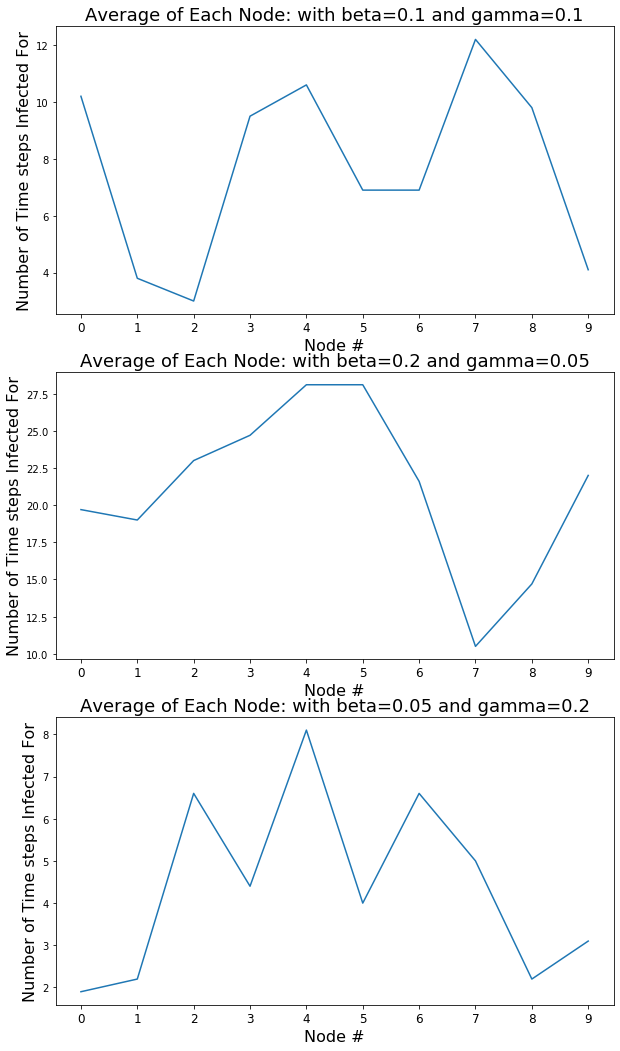

In [594]:

nodeList = []
for i in range(0,10):
    
    nodeList.append(i)
df_overall_avgNodes= pd.DataFrame(data=None, columns=np.array(range(4)))    
for i in range(0,len(dfBigThree)):
    beta=values[i][1]
    gamma=values[i][0]
    dfTemp= dfBigThree[i].copy()
    avgNodeList =[]
    for node in nodeList:
        avgNode = dfTemp.loc[node].mean()
        avgNodeList.append(avgNode)
    #print(avgNodeList)
    df_overall_avgNodes[i]=avgNodeList
    
    
    
    
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,18)) 

for i in range(0,len(dfBigThree)):
    beta=values[i][1]
    gamma=values[i][0]
    tempList = df_overall_avgNodes[i]
    axes[i].plot(range(0,10), tempList)
    plt.sca(axes[i])
    plt.xticks(np.linspace(0,9,num=10), fontsize=12)
    axes[i].set_title('Average of Each Node: with beta='+str(beta)+' and gamma='+str(gamma), fontsize=18)
    axes[i].set_ylabel("Number of Time steps Infected For", fontsize=16)
    axes[i].set_xlabel("Node #", fontsize=16)

each infected node at the start should disappear after $\sum_{i=0}^{numberOfSteps-1} (\gamma)$ since each step is independent
, where $numberOfStep =$ the time stamp where the node becomes removed


**Part H: **

Comment on anything you found interesting or unusual.

**I found this really fascinating, and would be cool to simulate with real data.**

Computational epidemiology is a huge field, and models can add all kinds of added components: nodes could be surfaces *or* people, graphs could be representing cities or communities instead of individuals, etc.  One similar model is used instead for diseases that don't ever have **R** states: nodes just transition from **I** to **S** because there may be no long-term immunity after infection.

If you're ever interested in learning more about computational epidemiology, CU-Boulder has a couple of world experts in network-based epidemology and computational public health.  Check our course offerings by Aaron Clauset and Dan Larremore for great opportunities to do these sorts of things in a more advanced setting.

<br>

---
[Back to top](#top)
<a id='bot'></a>